In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_NORMAL_500_v3.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,-1.037213,0.122516,2.222373,1.768441,0.535370,0.817126,0.887564,0.177032,-0.637317,0.170172,...,3.307236,3.567945,3.041047,2.650529,2.192301,NaN,NaN,NaN,0.424577,0.0
1,1.335390,1.592021,0.105620,-0.569830,-1.936606,-2.159233,0.055004,-0.304618,-0.428491,-2.114047,...,-3.127266,-2.525985,-2.156904,-1.265969,-1.088417,NaN,NaN,NaN,0.792029,0.0
2,0.576089,-0.614140,-1.955747,-0.383681,0.071087,0.605902,1.198012,1.982545,-0.035235,-1.106450,...,-2.174720,-2.015002,-1.678418,0.244067,1.764900,NaN,NaN,NaN,0.336560,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.692590
std        0.222238
min        0.247278
25%        0.485802
50%        0.780755
75%        0.903432
max        0.999553
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "fitness": logloss_fitness,
    "dist_function": "dtw",
    "apply_differencing": True,
    "population_size": 100,
    "max_shaps": 10,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <function gendis.shapelets_distances.dtw(timeseries_matrix, shaps, distances)>,
 'dist_func_returns': True,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': True,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 10,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.1932		-0.005365	1.7928
2		-0.0446		-0.005365	2.1394
3		-0.013		-0.00479	1.9727
4		-0.0072		-0.004492	1.8598
5		-0.0056		-0.002714	2.0354
6		-0.0048		-0.002516	2.1921
7		-0.0038		-0.002486	2.3026
8		-0.0031		-0.002465	2.6177
9		-0.0028		-0.002322	2.3636
10		-0.0027		-0.002322	2.2479
11		-0.0025		-0.002074	2.3551
12		-0.0024		-0.002074	2.5544
13		-0.0023		-0.00204	2.6556
14		-0.0023		-0.001975	2.7944
15		-0.0021		-0.001925	3.0486
16		-0.0021		-0.001776	3.3237
17		-0.002		-0.001696	3.1975
18		-0.0019		-0.001689	3.2686
19		-0.0018		-0.001688	3.7153
20		-0.0018		-0.001669	3.8672
21		-0.0018		-0.001582	4.0716
22		-0.0017		-0.001582	3.8971
23		-0.0017		-0.001582	4.1767
24		-0.0017		-0.001493	4.4925
25		-0.0016		-0.001421	4.5353
26		-0.0016		-0.001375	5.7705
27		-0.0015		-0.001375	4.1824
28		-0.0015		-0.001375	4.9638
29		-0.0015		-0.001375	5.183
30		-0.0015		-0.001375	5.2364
31		-0.0014		-0.001375	4.923
32		-0.0014		-0.001371	4.875
33		-0.0014		-0.001368	5.3527
34		-0.

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 4.35 s, sys: 184 µs, total: 4.35 s
Wall time: 4.34 s


In [15]:
distances[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


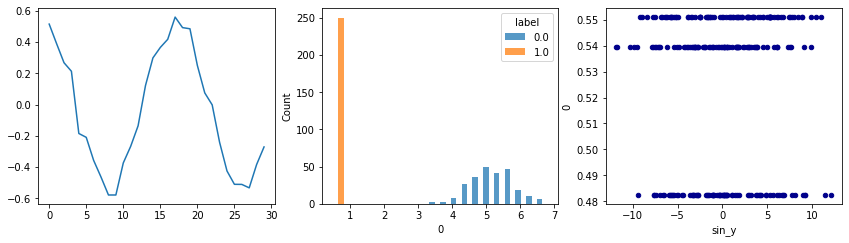

Testing separation for shapelet 1
Accuracy = 0.9925
[[197   3]
 [  0 200]]


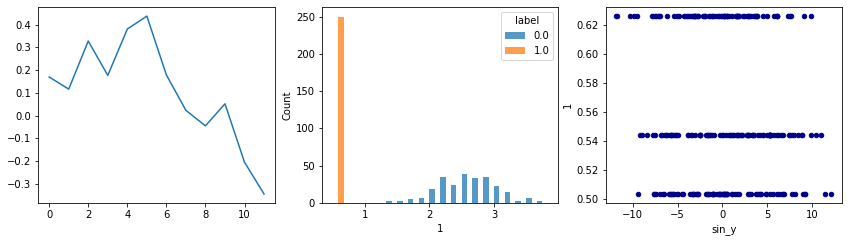

Testing separation for shapelet 2
Accuracy = 0.9975
[[199   1]
 [  0 200]]


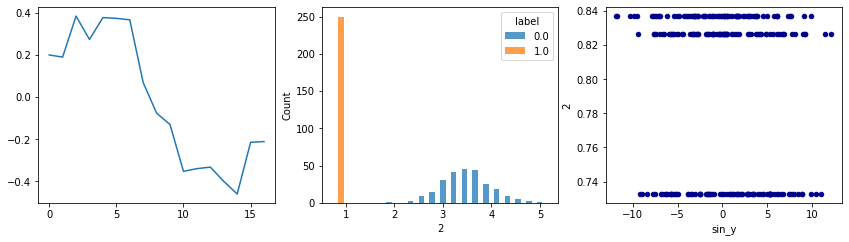

Testing separation for shapelet 3
Accuracy = 0.86
[[144  56]
 [  0 200]]


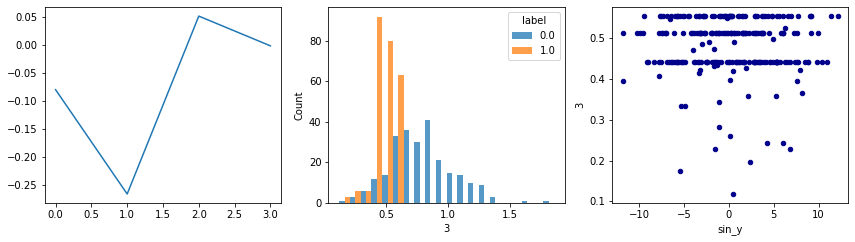

Testing separation for shapelet 4
Accuracy = 0.9975
[[199   1]
 [  0 200]]


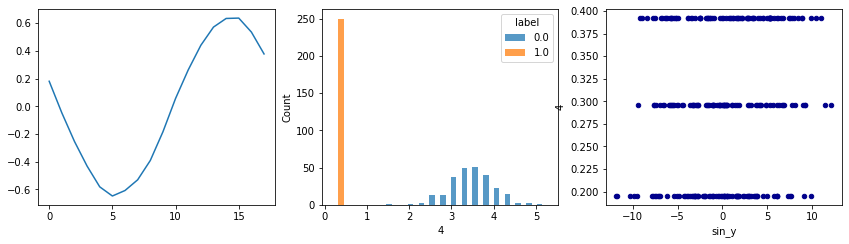

Testing separation for shapelet 5
Accuracy = 0.88
[[152  48]
 [  0 200]]


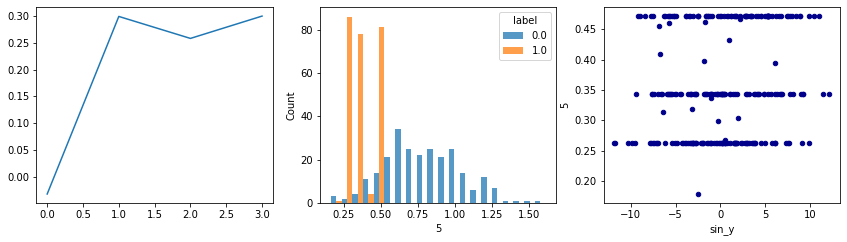

Testing separation for shapelet 6
Accuracy = 0.9975
[[199   1]
 [  0 200]]


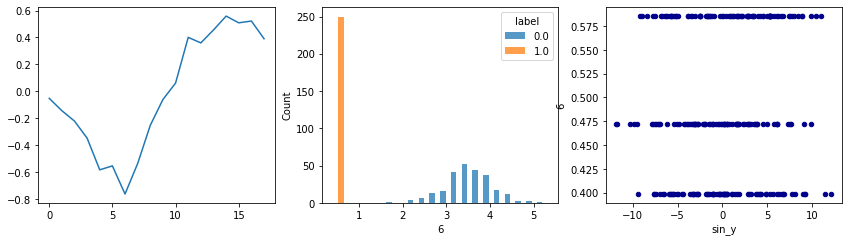

Testing separation for shapelet 7
Accuracy = 1.0
[[200   0]
 [  0 200]]


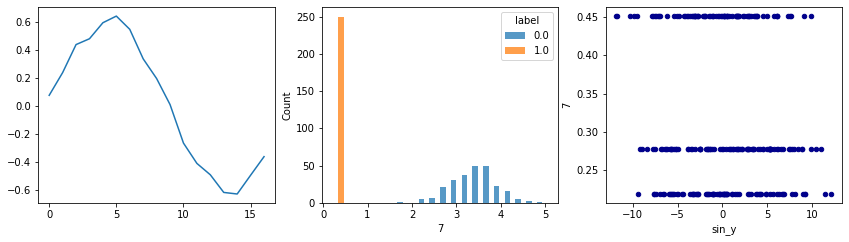

Testing separation for shapelet 8
Accuracy = 0.9975
[[199   1]
 [  0 200]]


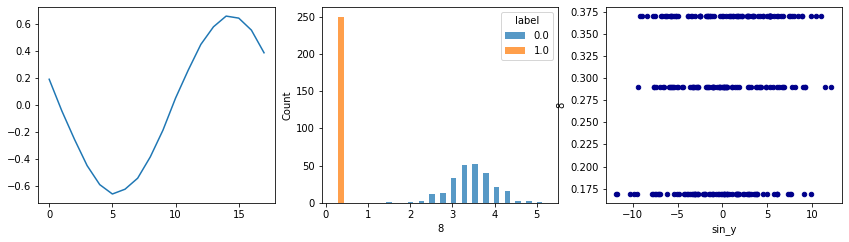

Testing separation for shapelet 9
Accuracy = 1.0
[[200   0]
 [  0 200]]


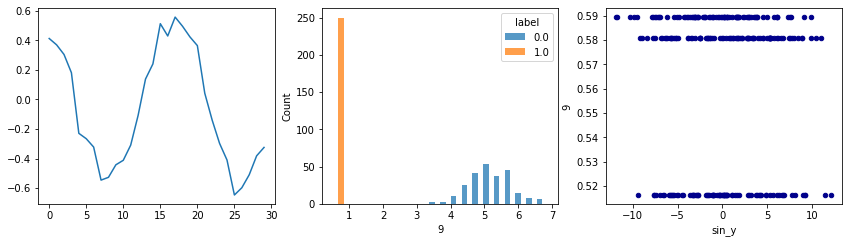

Testing separation for shapelet 10
Accuracy = 0.82
[[128  72]
 [  0 200]]


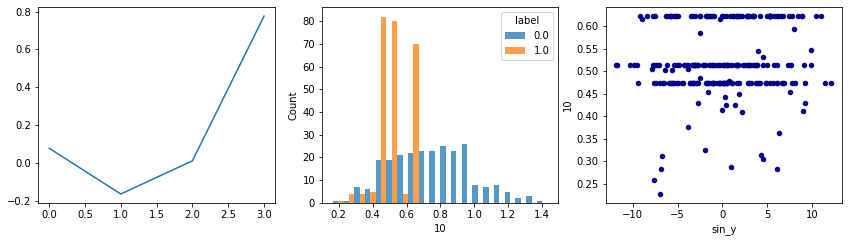

Testing separation for shapelet 11
Accuracy = 0.88
[[152  48]
 [  0 200]]


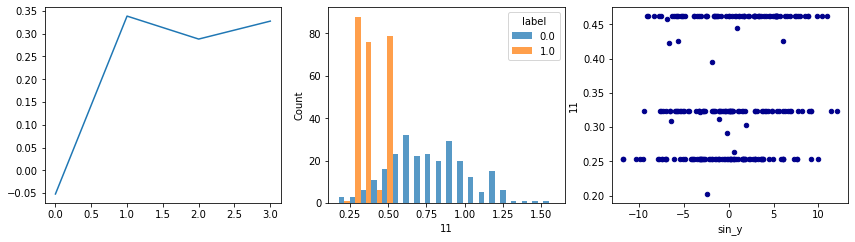

Testing separation for shapelet 12
Accuracy = 0.9975
[[199   1]
 [  0 200]]


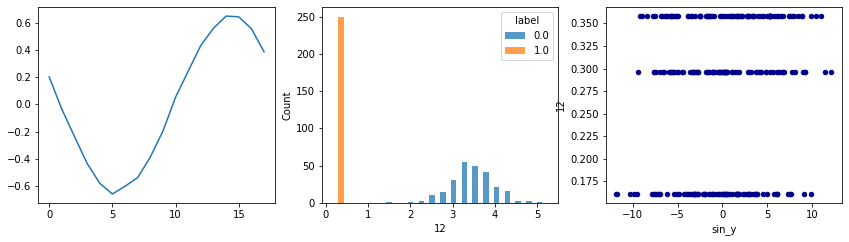

Testing separation for shapelet 13
Accuracy = 0.7
[[125  75]
 [ 45 155]]


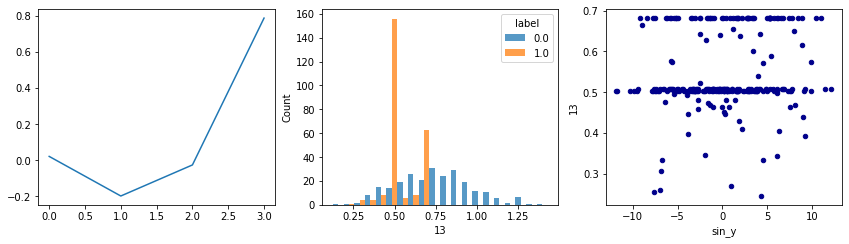

Testing separation for shapelet 14
Accuracy = 0.9975
[[199   1]
 [  0 200]]


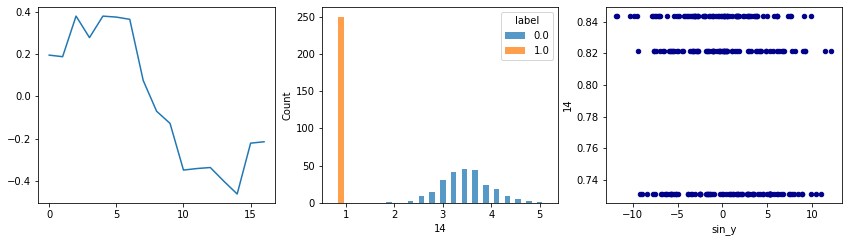

Testing separation for shapelet 15
Accuracy = 1.0
[[200   0]
 [  0 200]]


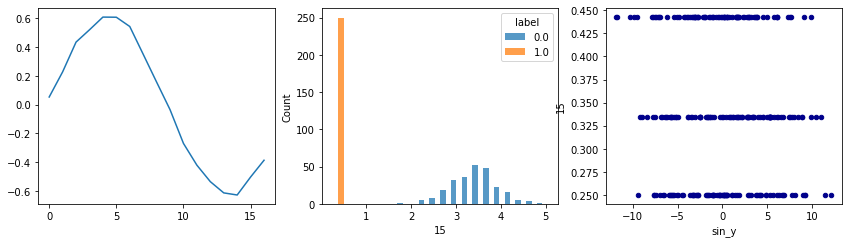

Testing separation for shapelet 16
Accuracy = 0.9925
[[197   3]
 [  0 200]]


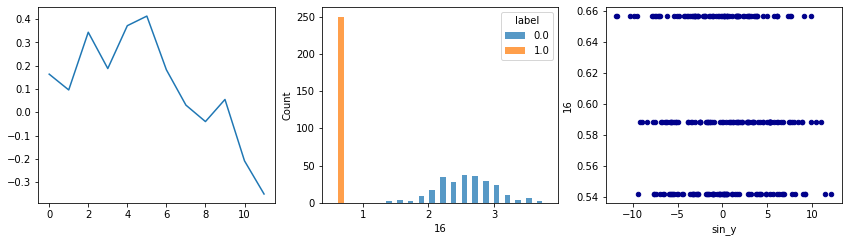

Testing separation for shapelet 17
Accuracy = 1.0
[[200   0]
 [  0 200]]


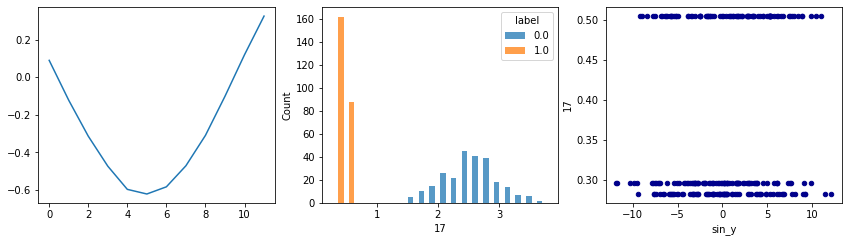

Testing separation for shapelet 18
Accuracy = 1.0
[[200   0]
 [  0 200]]


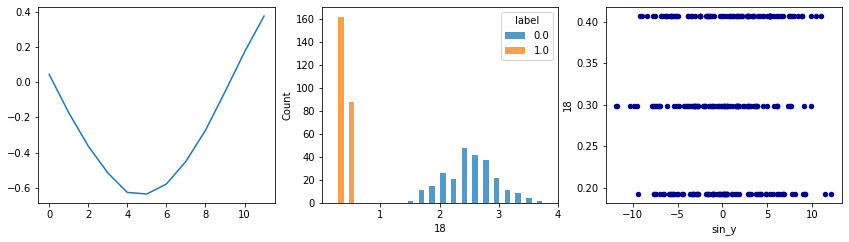

Testing separation for shapelet 19
Accuracy = 0.9975
[[199   1]
 [  0 200]]


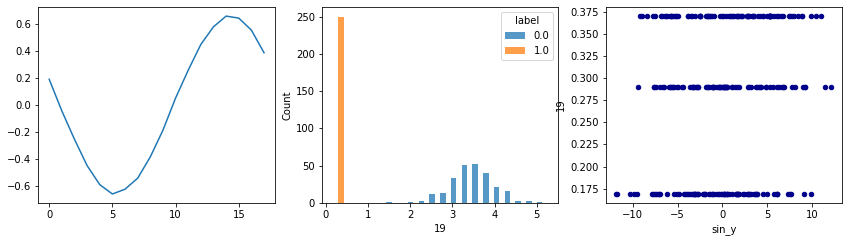

Testing separation for shapelet 20
Accuracy = 0.9975
[[199   1]
 [  0 200]]


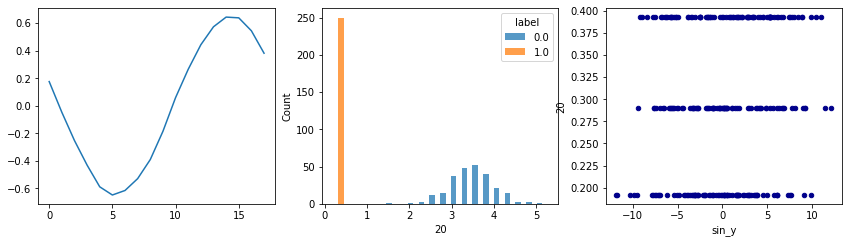

Testing separation for shapelet 21
Accuracy = 0.9925
[[197   3]
 [  0 200]]


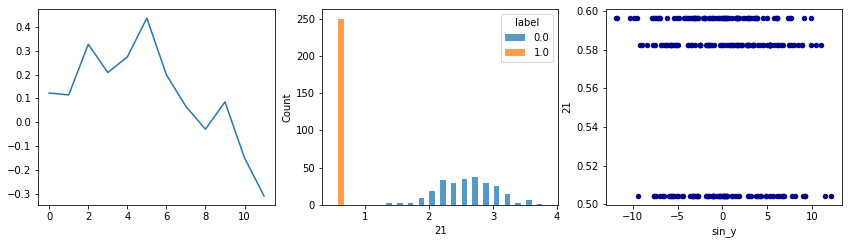

Testing separation for shapelet 22
Accuracy = 0.9975
[[199   1]
 [  0 200]]


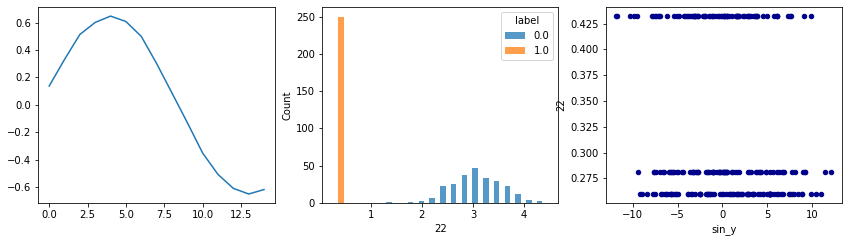

Testing separation for shapelet 23
Accuracy = 0.9125
[[165  35]
 [  0 200]]


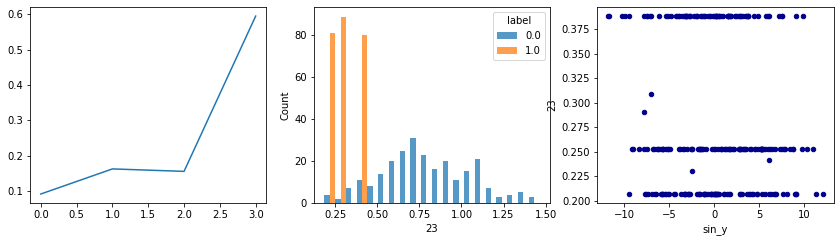

Testing separation for shapelet 24
Accuracy = 1.0
[[200   0]
 [  0 200]]


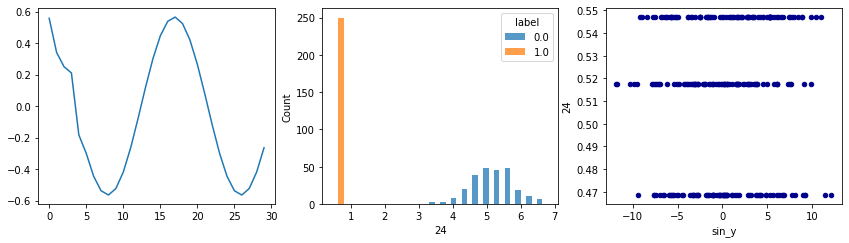

Testing separation for shapelet 25
Accuracy = 0.8725
[[149  51]
 [  0 200]]


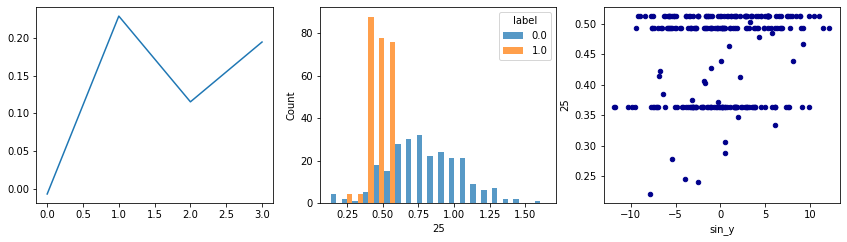

Testing separation for shapelet 26
Accuracy = 0.99
[[196   4]
 [  0 200]]


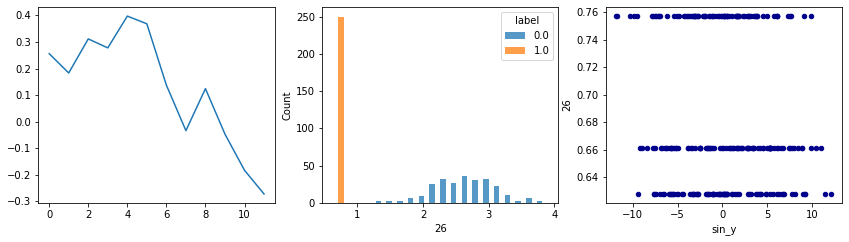

Testing separation for shapelet 27
Accuracy = 0.9975
[[199   1]
 [  0 200]]


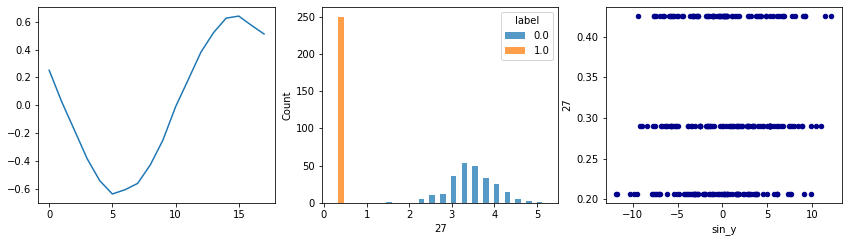

Testing separation for shapelet 28
Accuracy = 0.9975
[[199   1]
 [  0 200]]


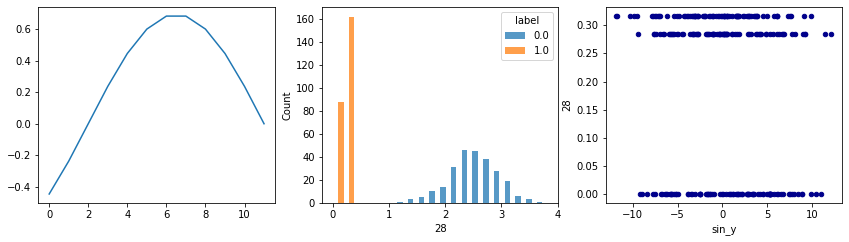

In [17]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i
    )